In [2]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

# get data
data = pd.read_csv("/content/happydata.csv")

# split data
y = data["happy"]
X = data.drop(["happy"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# choose classifier
clf = LGBMClassifier(random_state=0)

# fit classifier
clf.fit(X_train, y_train)

# score classifier
print(clf.score(X_test, y_test))

# display feature importances
pd.Series(clf.feature_importances_, index=X.columns).sort_values()

0.6666666666666666


policetrust      29
schoolquality    45
infoavail        46
ëvents           54
housecost        59
streetquality    88
dtype: int32

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
data = pd.read_csv('/content/happydata.csv')
data

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0
...,...,...,...,...,...,...,...
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0


In [6]:
## check null values
data.isnull().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

In [7]:
data = data.drop_duplicates().reset_index()
data.drop('index', axis=1, inplace=True)
data

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,5,3,5,5,5,1
...,...,...,...,...,...,...,...
120,5,2,3,4,4,3,1
121,5,3,3,1,3,5,0
122,5,2,3,4,2,5,1
123,4,3,3,4,4,5,0


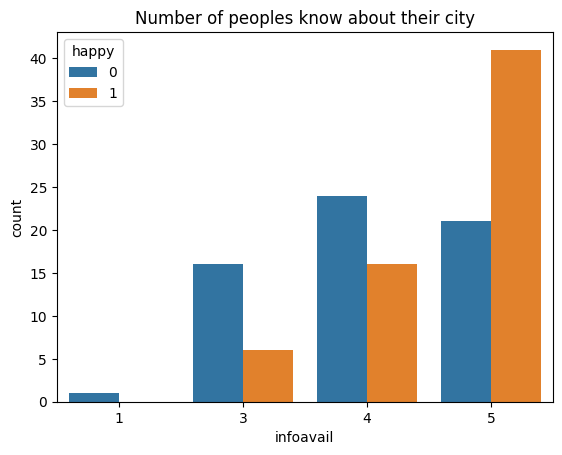

In [8]:
sns.countplot(x = 'infoavail', data=data, hue='happy')
plt.title('Number of peoples know about their city')
plt.show()

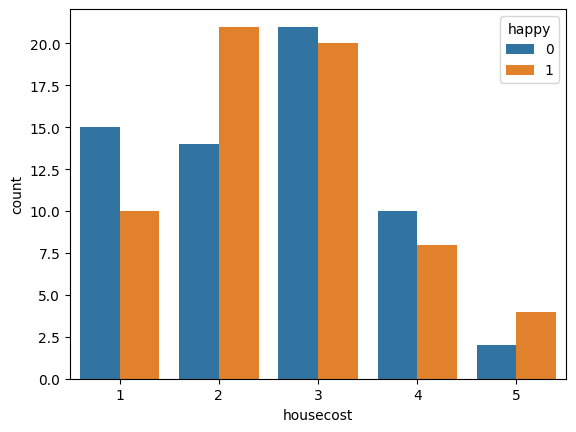

In [9]:
sns.countplot(x = 'housecost', data=data, hue='happy')
plt.show()

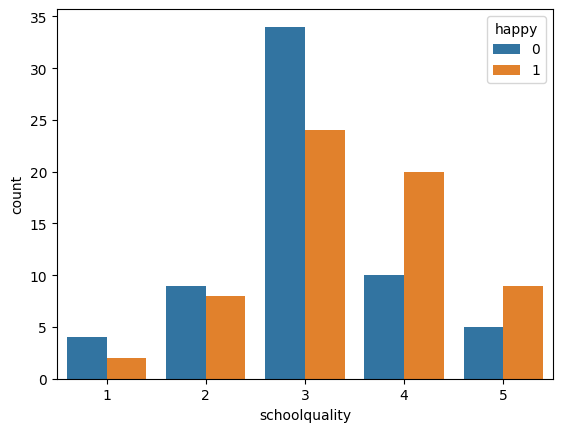

In [10]:
sns.countplot(x = 'schoolquality', data=data, hue='happy')
plt.show()

In [11]:
def make_group(data):
    d = {}
    d['total happy'] = len(data[data['happy'] == 1])
    d['total not happy'] = len(data[data['happy'] == 0])
    return pd.Series(d)

grouped = data.groupby('schoolquality').apply(make_group)
grouped = grouped.reset_index()
grouped['% of happy peoples'] = 100 * grouped['total happy'] / (grouped['total happy'] + grouped['total not happy'])
grouped

,schoolquality,total happy,total not happy,% of happy peoples
0,1,2,4,33.333333
1,2,8,9,47.058824
2,3,24,34,41.379310
3,4,20,10,66.666667
4,5,9,5,64.285714


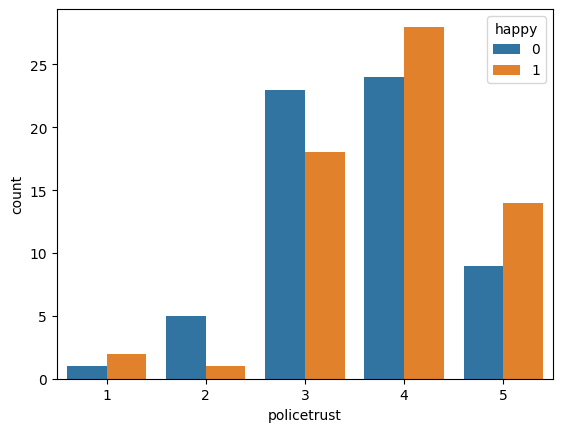

In [12]:
sns.countplot(x = 'policetrust', data=data, hue='happy')
plt.show()

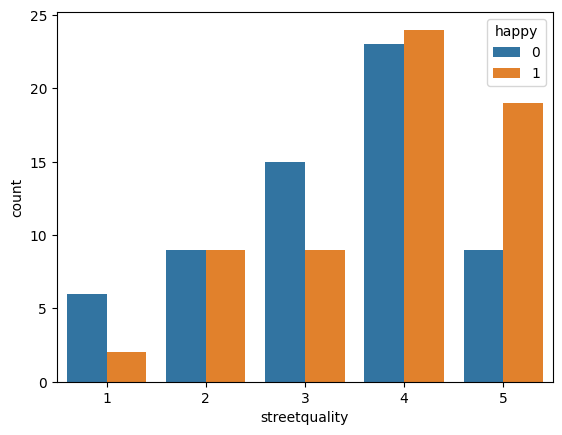

In [13]:
sns.countplot(x = 'streetquality', data=data, hue='happy')
plt.show()

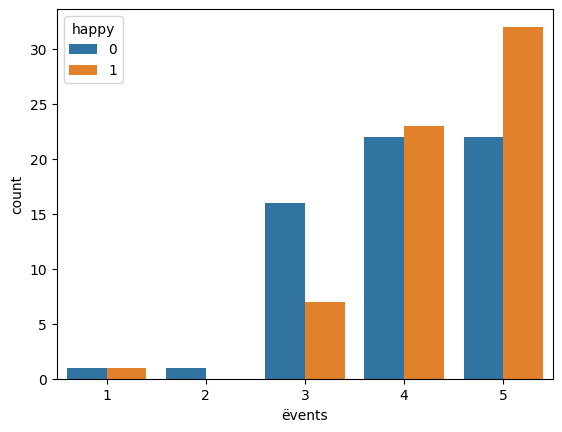

In [14]:
sns.countplot(x = 'ëvents', data=data, hue='happy')
plt.show()

In [15]:
data['happy'].value_counts()

1    63
0    62
Name: happy, dtype: int64

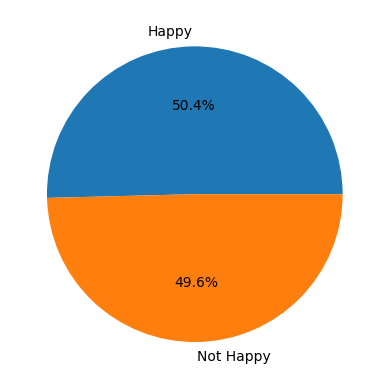

In [16]:
labels = ['Happy', 'Not Happy']
values = data['happy'].value_counts().values
plt.pie(values, labels = labels,autopct='%1.1f%%')
plt.show()

In [17]:
data.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000
mean,4.296000,2.560000,3.232000,3.688000,3.55200,4.184000,0.504000
std,0.813436,1.110071,0.984853,0.910654,1.17402,0.874219,0.501996
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.00000,4.000000,0.000000
50%,4.000000,3.000000,3.000000,4.000000,4.00000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.00000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,1.000000


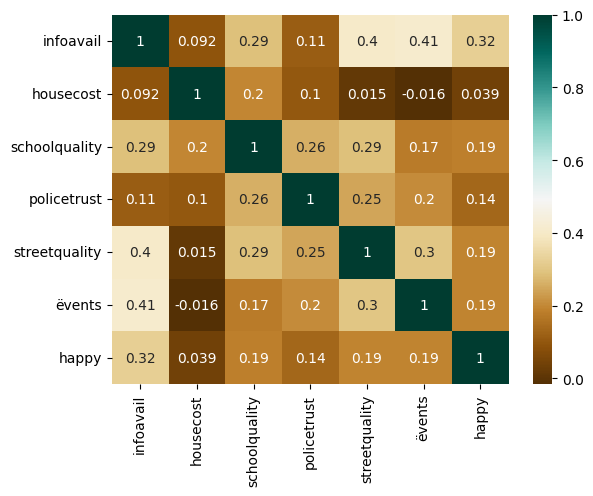

In [18]:
## heatmap - finding correlation
sns.heatmap(data.corr(), annot=True, cmap='BrBG')
plt.show()

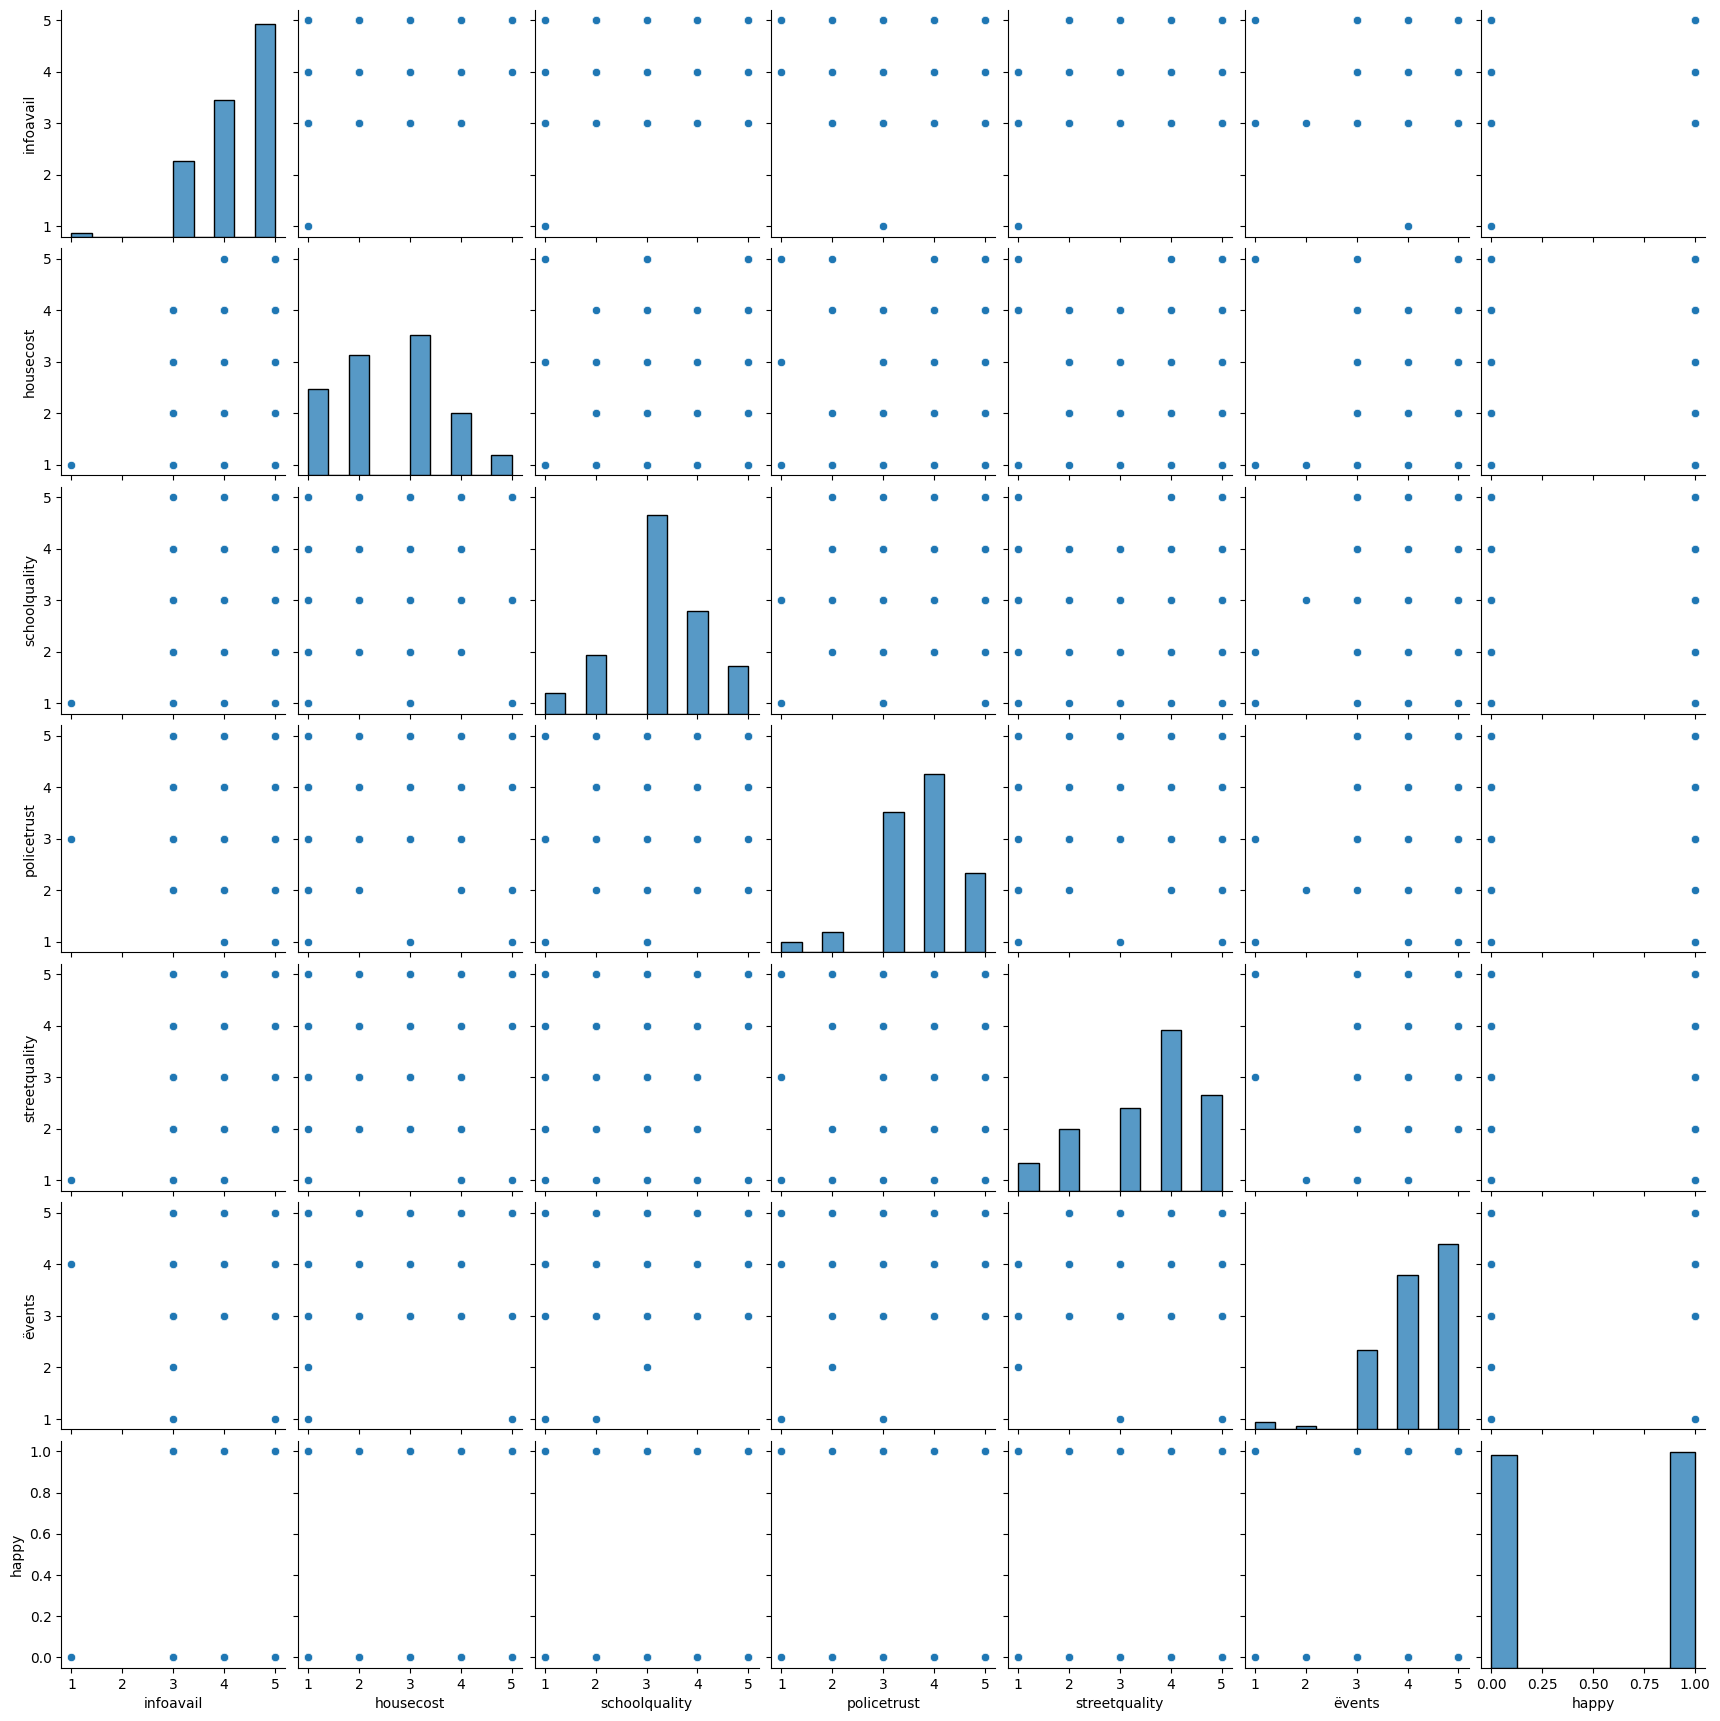

In [19]:
sns.pairplot(data)
plt.show()

In [20]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [21]:
## spliting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## for LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

## for naive_bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

## for knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

## for Linear SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

## for kernel SVM
ksvm = SVC(kernel = 'rbf')
ksvm.fit(X_train, y_train)
y_pred_ksvm = ksvm.predict(X_test)

## DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

## RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

## for xgboost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [23]:
## Compare Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
df = pd.DataFrame({
    'Model Name': ['LR', 'KNN', 'SVM', 'Kernel SVM','Naive Bayes', 'DecisionTree', 'RandomForest', 'XGBoost'],
    'True Negative': [confusion_matrix(y_test, y_pred_lr).ravel()[0], confusion_matrix(y_test, y_pred_knn).ravel()[0], confusion_matrix(y_test, y_pred_svm).ravel()[0], confusion_matrix(y_test, y_pred_ksvm).ravel()[0], confusion_matrix(y_test, y_pred_gnb).ravel()[0], confusion_matrix(y_test, y_pred_dtc).ravel()[0], confusion_matrix(y_test, y_pred_rfc).ravel()[0], confusion_matrix(y_test, y_pred_xgb).ravel()[0]],
    'False Positive': [confusion_matrix(y_test, y_pred_lr).ravel()[1], confusion_matrix(y_test, y_pred_knn).ravel()[1], confusion_matrix(y_test, y_pred_svm).ravel()[1], confusion_matrix(y_test, y_pred_ksvm).ravel()[1], confusion_matrix(y_test, y_pred_gnb).ravel()[1], confusion_matrix(y_test, y_pred_dtc).ravel()[1], confusion_matrix(y_test, y_pred_rfc).ravel()[1], confusion_matrix(y_test, y_pred_xgb).ravel()[1]],
    'False Negative': [confusion_matrix(y_test, y_pred_lr).ravel()[2], confusion_matrix(y_test, y_pred_knn).ravel()[2], confusion_matrix(y_test, y_pred_svm).ravel()[2], confusion_matrix(y_test, y_pred_ksvm).ravel()[2], confusion_matrix(y_test, y_pred_gnb).ravel()[2], confusion_matrix(y_test, y_pred_dtc).ravel()[2], confusion_matrix(y_test, y_pred_rfc).ravel()[2], confusion_matrix(y_test, y_pred_xgb).ravel()[2]],
    'True Positive': [confusion_matrix(y_test, y_pred_lr).ravel()[3], confusion_matrix(y_test, y_pred_knn).ravel()[3], confusion_matrix(y_test, y_pred_svm).ravel()[3], confusion_matrix(y_test, y_pred_ksvm).ravel()[3], confusion_matrix(y_test, y_pred_gnb).ravel()[3], confusion_matrix(y_test, y_pred_dtc).ravel()[3], confusion_matrix(y_test, y_pred_rfc).ravel()[3], confusion_matrix(y_test, y_pred_xgb).ravel()[3]],
    'Accuracy Score': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_ksvm), accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_rfc), accuracy_score(y_test, y_pred_xgb)],
    'F1 Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_ksvm), f1_score(y_test, y_pred_gnb), f1_score(y_test, y_pred_dtc), f1_score(y_test, y_pred_rfc), f1_score(y_test, y_pred_xgb)]
})
df

,Model Name,True Negative,False Positive,False Negative,True Positive,Accuracy Score,F1 Score
0,LR,6,4,8,7,0.52,0.538462
1,KNN,7,3,9,6,0.52,0.500000
2,SVM,8,2,8,7,0.60,0.583333
3,Kernel SVM,8,2,8,7,0.60,0.583333
4,Naive Bayes,6,4,8,7,0.52,0.538462
5,DecisionTree,9,1,8,7,0.64,0.608696
6,RandomForest,7,3,7,8,0.60,0.615385
7,XGBoost,6,4,6,9,0.60,0.642857
